### Linear eqution with sparse matrices

In [2]:
import numpy as np
import scipy 
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pylab as plt
import time
from math import sinh
from astropy.units import dT
import matplotlib.pyplot as plt

#### Conjugate gradient method

In [3]:
"""conjugate gradient method""" 
# Libraries
from scipy.sparse import rand
import numpy
from sys import argv


def conjugate_gradient(range_num):
    #precision paraameter 
    norm_value_list = [] 
    for dim in range(2, range_num,2):
    # Input Parameters
        #dimension = 5
        sparsity = 0.5
    # Initial Matrix and Vectors
        A = rand(dim, dim, density=sparsity, format="csr")
        A = A + A.T
        x = numpy.zeros(dim)
        x[0] = 1
        b = numpy.random.rand(dim)

    # Iterate
        r = b - A.dot(x)
        p = r.copy()
        for i in range(0, 100):
            Ap = A.dot(p)
            top = numpy.dot(r.T, r)
            bottom = numpy.dot(p.T, Ap)
            alpha = top / bottom

            x = x + alpha * p
            r = r - alpha * Ap

            norm_value =  numpy.linalg.norm(r)
            
            if norm_value < 1e-8:
                break
            new_top = numpy.dot(r.T, r)
            beta = new_top/top
            p = r + beta * p

        print("Done:", "number of iterarions: = ",i,"normalizing value: = ", norm_value)
        norm_value_list.append(norm_value)
        #print(A)
        #print(x)
    return norm_value_list

In [4]:
#testing criteria 
dim = 5
eps = 1e-8
sparsity = 0.5
A = rand(dim, dim, density=sparsity, format="csr")
A = A + A.T
b = numpy.random.rand(dim)


In [5]:
"""Gauss-Seidel method"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse
from numpy import linalg as nr
from math import sqrt


def gauss_seidel():
     #precision paraameter 
    dim = 5
    # Input Parameters
        #dimension = 5
    sparsity = 0.5


    # Initial Matrix and Vectors
    A = rand(dim, dim, density=sparsity, format="csr")
    A = A + A.T
    x = numpy.zeros(dim)
    x[0] = 1
    b = numpy.random.rand(dim)
    k=1
    r_0 = b - A.dot(x)
    r_k = r_0
    x_k = np.ones(dim*k).reshape(k,dim)
    r_k = np.ones(dim*k).reshape(k,dim)
   

    while (numpy.linalg.norm(r_k)> eps*numpy.linalg.norm(r_0)):
        k = k + 1
       
        for i in range(0, dim - 1): 
            x_k[k,i] = r_k[k-1,i]/A[i,i]+x_k[k-1,i]
        r_k = A.dot(x_k)
                
    x = x_k
    # Iterate

    return x


Done: number of iterarions: =  20 normalizing value: =  7.794080255437282e-09
Done: number of iterarions: =  24 normalizing value: =  3.978869153950289e-10
Done: number of iterarions: =  28 normalizing value: =  5.342201122612308e-10
Done: number of iterarions: =  29 normalizing value: =  1.3892563960214388e-10
Done: number of iterarions: =  34 normalizing value: =  2.3278121621819335e-09
Done: number of iterarions: =  33 normalizing value: =  8.140922353926584e-09
Done: number of iterarions: =  39 normalizing value: =  1.0099765853291675e-09
Done: number of iterarions: =  40 normalizing value: =  8.603015967946691e-09
Done: number of iterarions: =  45 normalizing value: =  2.141475525929371e-09
Done: number of iterarions: =  52 normalizing value: =  5.660200456203906e-09
Done: number of iterarions: =  50 normalizing value: =  3.844944274708832e-09
Done: number of iterarions: =  56 normalizing value: =  5.712313430291973e-09
Done: number of iterarions: =  55 normalizing value: =  4.291

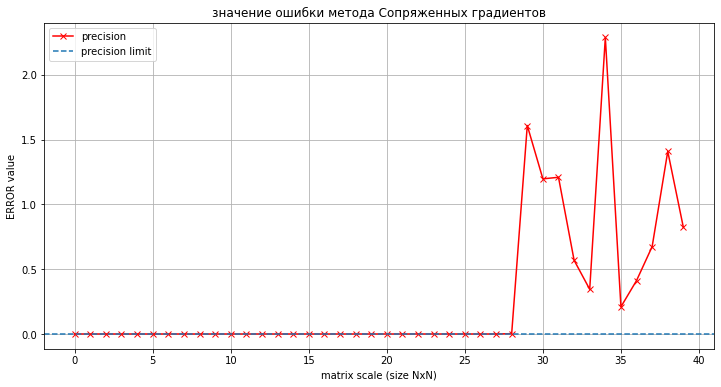

In [12]:
"""conjugate method test"""
#print(conjugate_gradient())
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(conjugate_gradient(100),"x-r", label= "precision")

plt.title("значение ошибки метода Сопряженных градиентов")
plt.axhline(y=1e-8,label="precision limit", linestyle = '--')
plt.legend()
plt.ylabel("ERROR value")
plt.xlabel("matrix scale (size NxN)")

plt.grid()
plt.show()

### Testing

In [116]:
from datetime import datetime
import time

range_num = 22
time_limit = []
for i in range(range_num): 
    
    start_time = datetime.now()

    conjugate_gradient(range_num)
    time.sleep(5)
    time_limit.append(datetime.now() - start_time)
    

Done: number of iterarions: =  1 normalizing value: =  2.7755575615628914e-17
Done: number of iterarions: =  3 normalizing value: =  1.5577353184171695e-15
Done: number of iterarions: =  5 normalizing value: =  4.2292095709965436e-13
Done: number of iterarions: =  7 normalizing value: =  1.0553614722427195e-12
Done: number of iterarions: =  12 normalizing value: =  1.424136488693024e-09
Done: number of iterarions: =  12 normalizing value: =  1.481360748586521e-10
Done: number of iterarions: =  14 normalizing value: =  1.0282158030369405e-12
Done: number of iterarions: =  16 normalizing value: =  6.740789202368875e-10
Done: number of iterarions: =  20 normalizing value: =  1.502060220208408e-09
Done: number of iterarions: =  20 normalizing value: =  3.7861974154960476e-09
Done: number of iterarions: =  1 normalizing value: =  1.8875832159447664e-16
Done: number of iterarions: =  3 normalizing value: =  9.58137645645067e-13
Done: number of iterarions: =  5 normalizing value: =  3.0216122

Done: number of iterarions: =  1 normalizing value: =  4.440892098500626e-16
Done: number of iterarions: =  3 normalizing value: =  4.4504436225339376e-14
Done: number of iterarions: =  5 normalizing value: =  2.48282534156256e-13
Done: number of iterarions: =  7 normalizing value: =  7.337764110392955e-12
Done: number of iterarions: =  9 normalizing value: =  4.184453952815972e-09
Done: number of iterarions: =  12 normalizing value: =  2.6424422553347934e-12
Done: number of iterarions: =  14 normalizing value: =  5.621214567531564e-12
Done: number of iterarions: =  16 normalizing value: =  8.552194549149112e-10
Done: number of iterarions: =  18 normalizing value: =  6.712207980480004e-10
Done: number of iterarions: =  20 normalizing value: =  4.6035648827838424e-09
Done: number of iterarions: =  1 normalizing value: =  4.739836287564747e-17
Done: number of iterarions: =  3 normalizing value: =  5.294262369644526e-15
Done: number of iterarions: =  5 normalizing value: =  1.053509721095

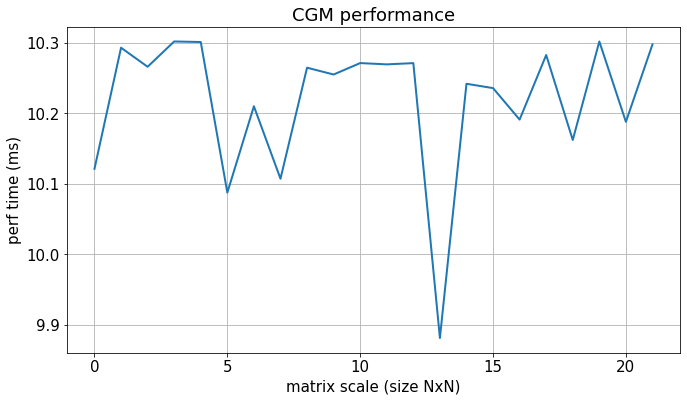

In [136]:
time = []
for i in range(range_num):
    time.append(time_limit[i].microseconds)
plt.figure(figsize = (11,6))
plt.plot(np.log(time))
plt.grid()
plt.title("CGM performance")
plt.xlabel("matrix scale (size NxN)")
plt.ylabel("perf time (ms)")
plt.show()
